# Financial Analysis
Financial Analysis of Volatile Stocks

This notebook demonstrates how to analyze the historical prices of volatile stocks using Python.
 We will:
 1. Import the necessary libraries for financial data analysis
 2. Download historical stock data using yfinance
 3. Clean and prepare the data for analysis



# 1. Importing Libraries
 We need pandas for data handling, matplotlib for plotting, and yfinance for fetching stock data.


In [1]:
!pip install yfinance pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Set up visual style for better-looking plots
plt.style.use('seaborn-v0_8-whitegrid')  # Clean style with grid
plt.rcParams['figure.figsize'] = (12, 6)  # Default figure size

     |████████████████████████████████| 118 kB 835 kB/s eta 0:00:01
  Using cached pandas-2.3.0-cp39-cp39-macosx_11_0_arm64.whl (10.8 MB)
  Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl (7.8 MB)
     |████████████████████████████████| 3.0 MB 55.5 MB/s eta 0:00:01
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
  Using cached beautifulsoup4-4.13.4-py3-none-any.whl (187 kB)
     |████████████████████████████████| 64 kB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 173 kB 51.0 MB/s eta 0:00:01
  Using cached frozendict-2.4.6-cp39-cp39-macosx_11_0_arm64.whl (37 kB)
  Using cached peewee-3.18.1-cp39-cp39-macosx_10_9_universal2.whl
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
     |████████████████████████████████| 425 kB 62.3 MB/s eta 0:00:01
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl (249 

## 2. Downloading Stock Data


/var/folders/m8/v5f6mgds38vc772w_62zc7qm0000gn/T/ipykernel_36148/1464843400.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start='2020-01-01')
[*********************100%***********************]  5 of 5 completed

Ticker            AMC        AMD     GME      NVDA       TSLA
Date                                                         
2020-01-02  74.145119  49.099998  1.5775  5.971746  28.684000
2020-01-03  72.753654  48.599998  1.4700  5.876163  29.534000
2020-01-06  70.765854  48.389999  1.4625  5.900806  30.102667
2020-01-07  70.865250  48.250000  1.3800  5.972243  31.270666
2020-01-08  65.796341  47.830002  1.4300  5.983444  32.809334


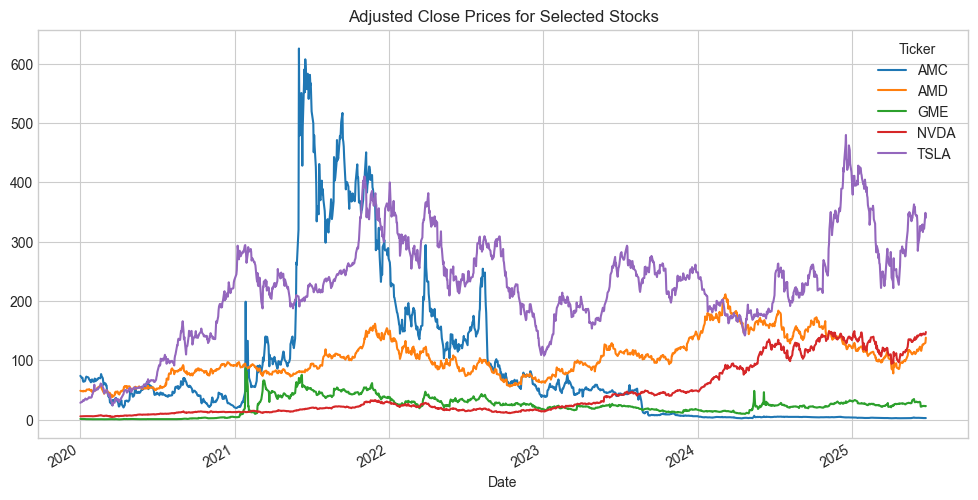

In [19]:


# Styling
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 5 volatile stocks
stocks = ['TSLA', 'NVDA', 'AMD', 'GME', 'AMC']

# Download adjusted data (which is now in the 'Close' column!)
data = yf.download(stocks, start='2020-01-01')

# Use the 'Close' column — it's already adjusted
adj_close = data['Close']

# Extract just the closing prices
close_prices = data['Close']

# Preview
print(adj_close.head())

# Show the first few rows to understand the structure
data.head()

# Plotting
adj_close.plot(title='Adjusted Close Prices for Selected Stocks')
plt.show()


### Data Cleaning and Preparation

Now let's clean and prepare our data:
1. Extract and convert dates to a proper datetime format
2. Convert ratings to numeric values
3. Remove records with missing values
4. Focus on a specific time period

Missing values per stock:
Price   Ticker
Close   AMC       0
        AMD       0
        GME       0
        NVDA      0
        TSLA      0
High    AMC       0
        AMD       0
        GME       0
        NVDA      0
        TSLA      0
Low     AMC       0
        AMD       0
        GME       0
        NVDA      0
        TSLA      0
Open    AMC       0
        AMD       0
        GME       0
        NVDA      0
        TSLA      0
Volume  AMC       0
        AMD       0
        GME       0
        NVDA      0
        TSLA      0
dtype: int64
Any missing values left? False


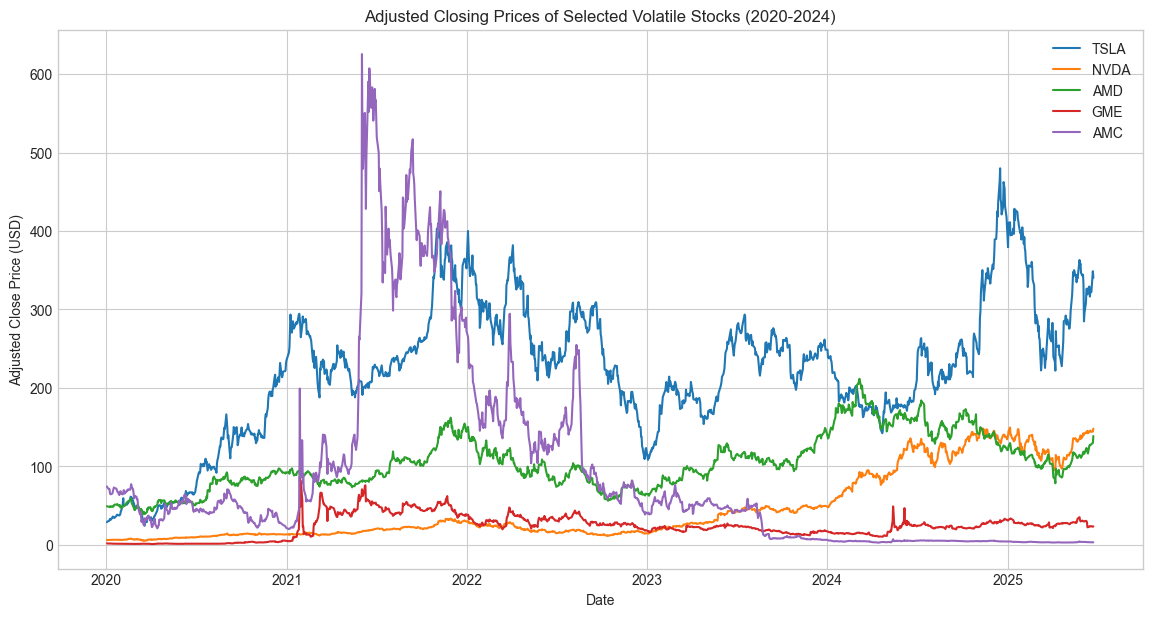

In [20]:
# 3. Cleaning and Preparing the Data
# - Check for missing values
# - Forward-fill missing data (common in stock data due to market holidays)
# - Set the date as the index (already done by yfinance)

# Check for missing values
print('Missing values per stock:')
print(data.isnull().sum())

# Extract only the adjusted closing prices
close_prices = data['Close']

# Fill missing values (new syntax)
close_prices = close_prices.ffill()

# Check again
print('Any missing values left?', close_prices.isnull().any().any())

# Plot it
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(close_prices.index, close_prices[stock], label=stock)
plt.title('Adjusted Closing Prices of Selected Volatile Stocks (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.show()


# Now the data is ready for further financial analysis, such as calculating returns, volatility, or building predictive models.

## 3. Calculating financial measures

1. Calculate daily returns for each stock

2. Calculate Bollinger Bands

3. Calculate RSI (Relative Strength Index)

4. Calculate MACD (Moving Average Convergence Divergence)

5. Simple Price Prediction (Moving Average Forecast)


First 5 rows of daily returns:
Ticker           AMC       AMD       GME      NVDA      TSLA
Date                                                        
2020-01-02       NaN       NaN       NaN       NaN       NaN
2020-01-03 -0.018767 -0.010183 -0.068146 -0.016006  0.029633
2020-01-06 -0.027322 -0.004321 -0.005102  0.004194  0.019255
2020-01-07  0.001405 -0.002893 -0.056410  0.012106  0.038801
2020-01-08 -0.071529 -0.008705  0.036232  0.001875  0.049205

--- TSLA ---


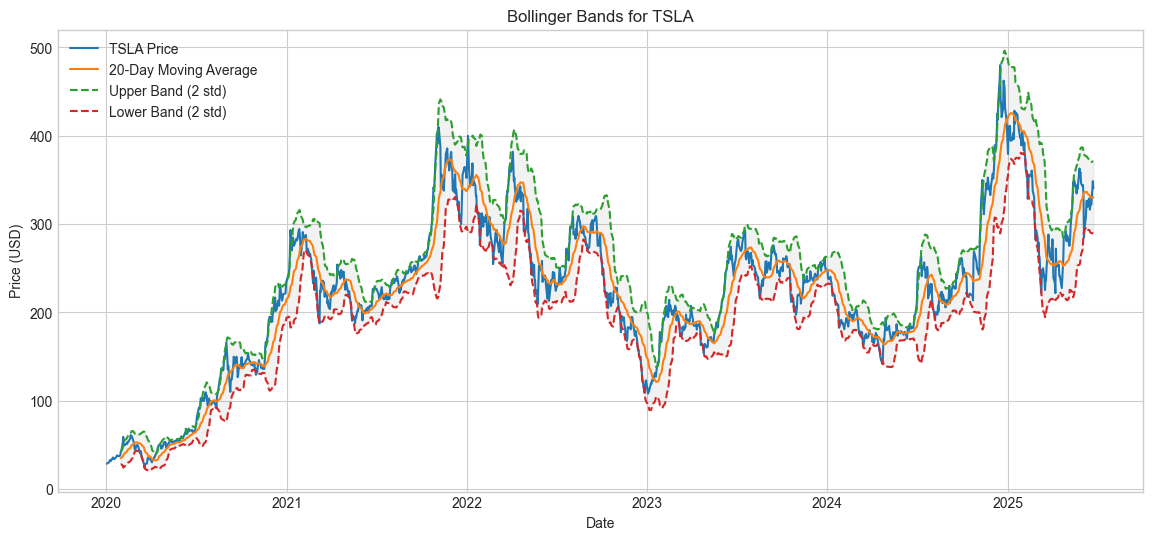

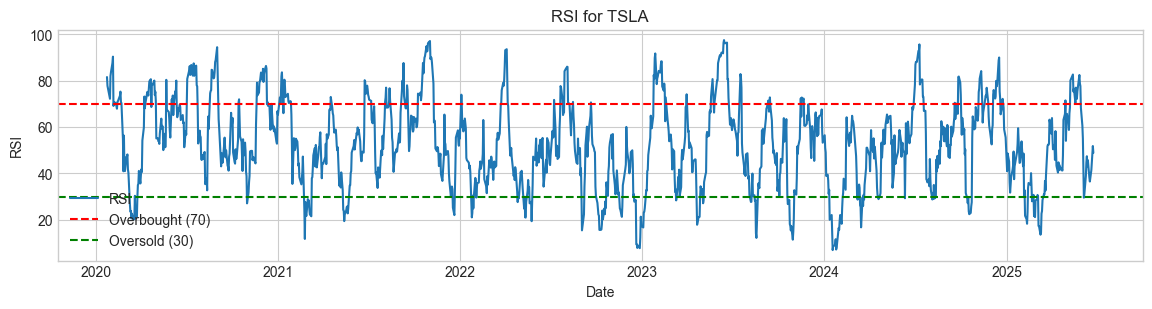

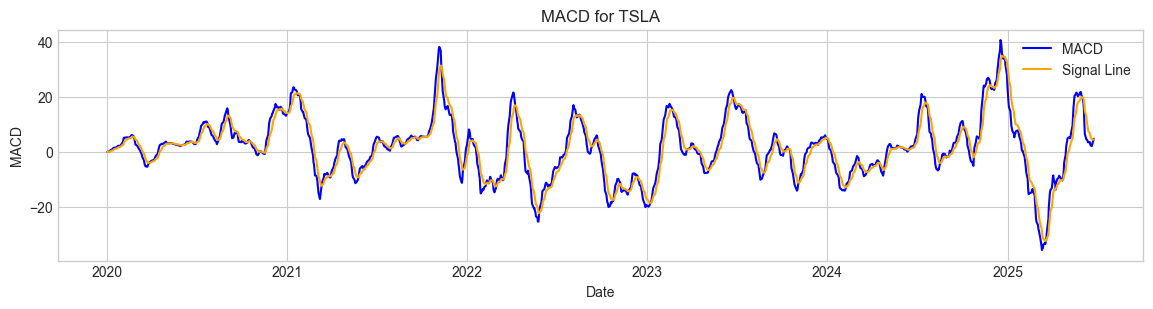

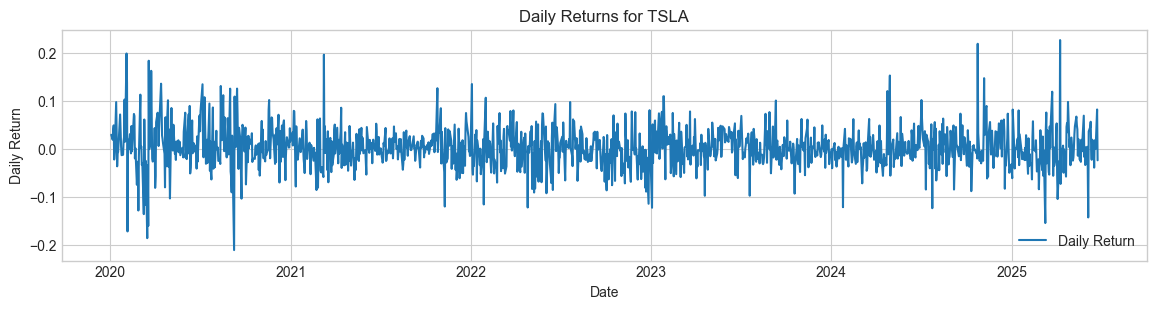


--- NVDA ---


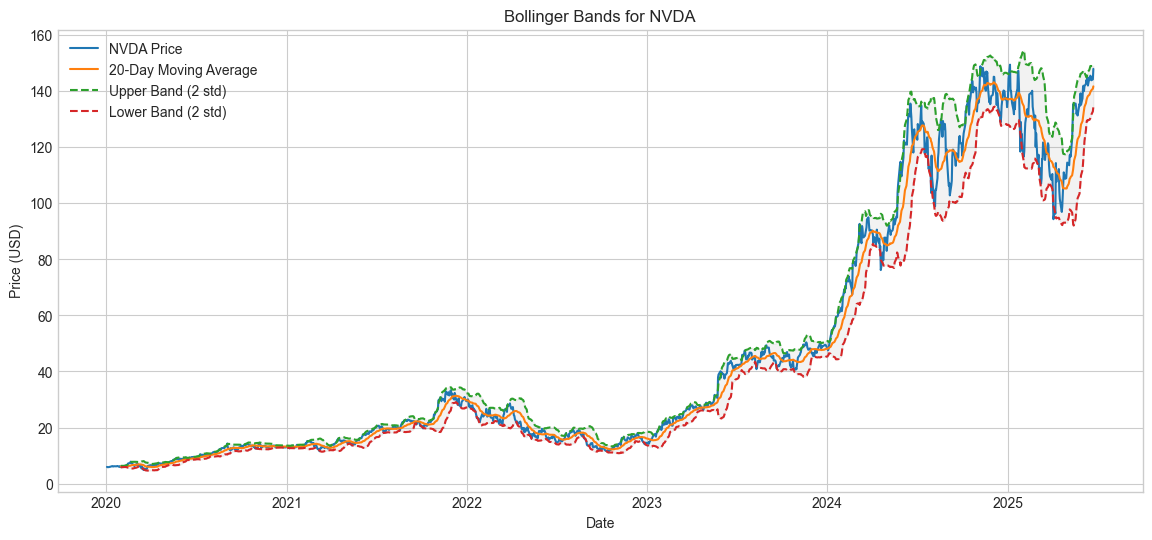

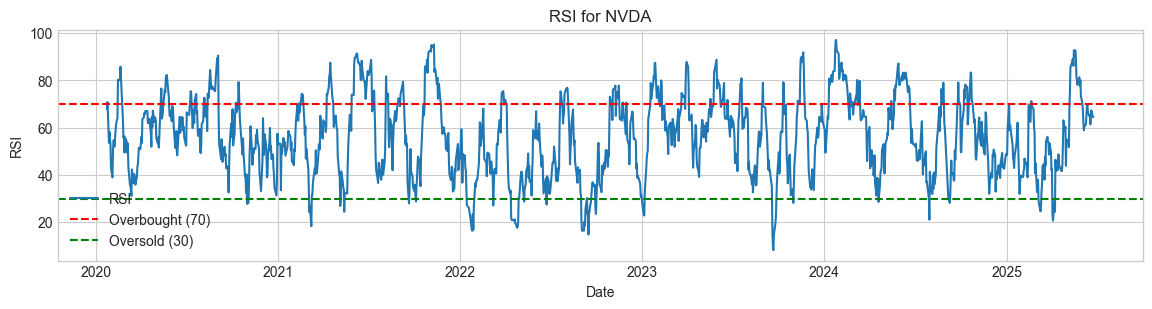

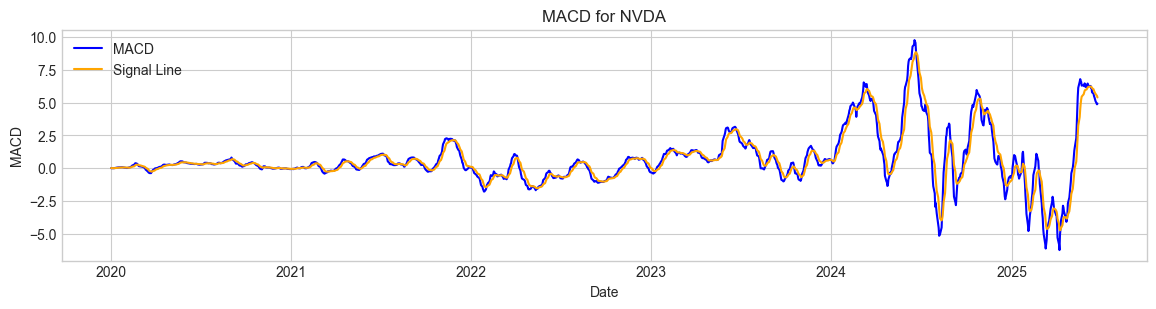

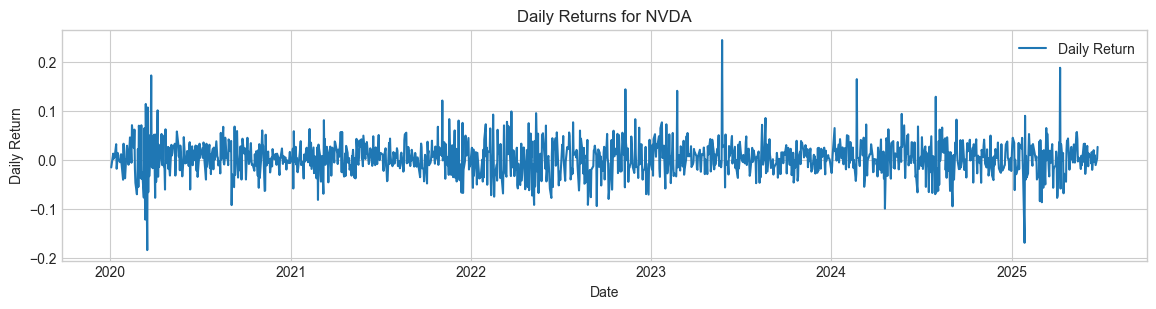


--- AMD ---


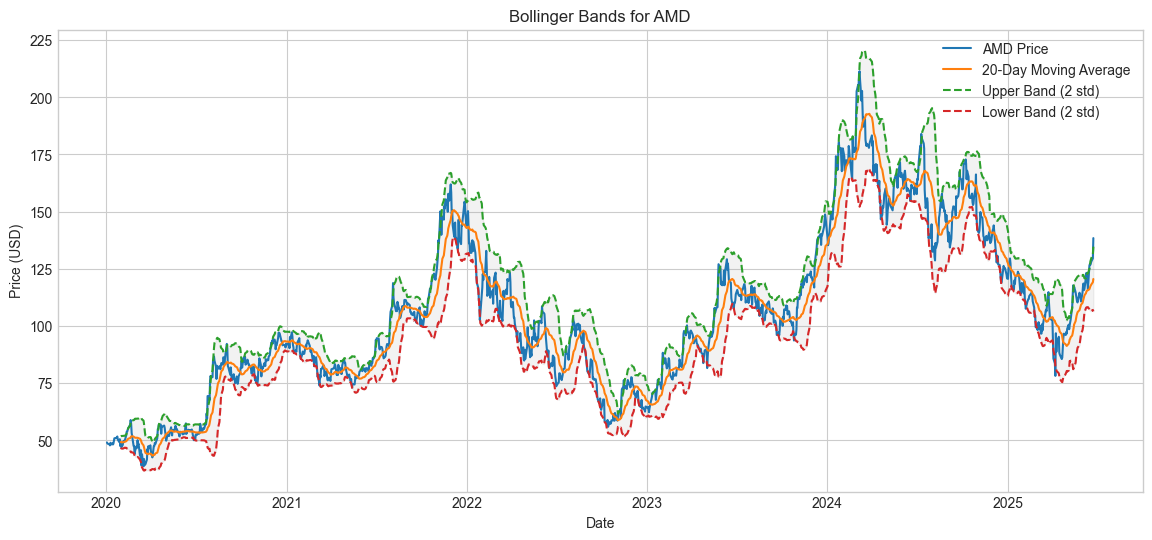

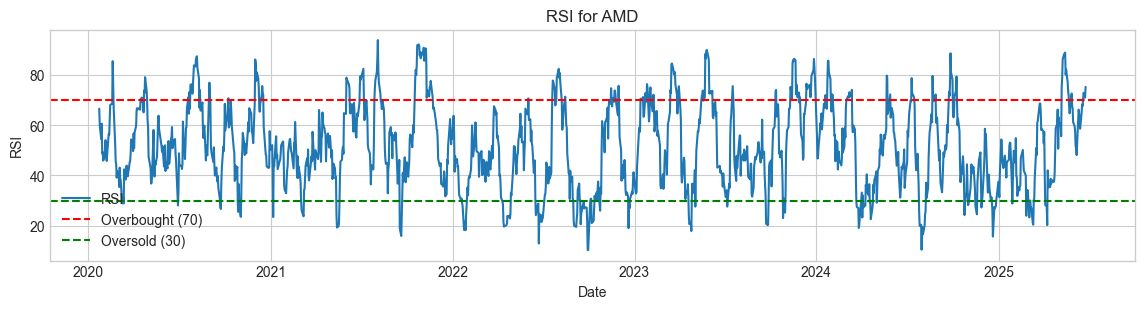

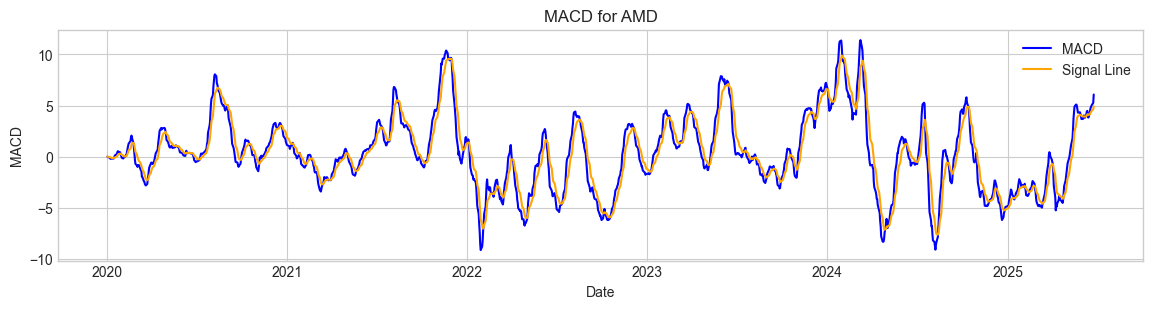

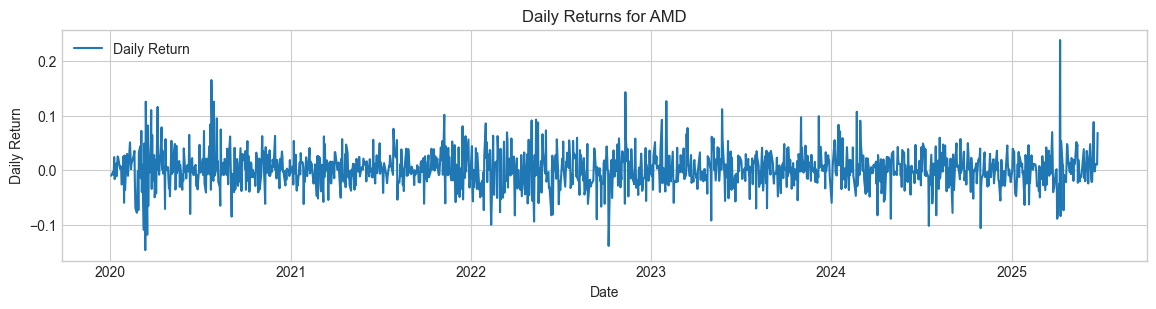


--- GME ---


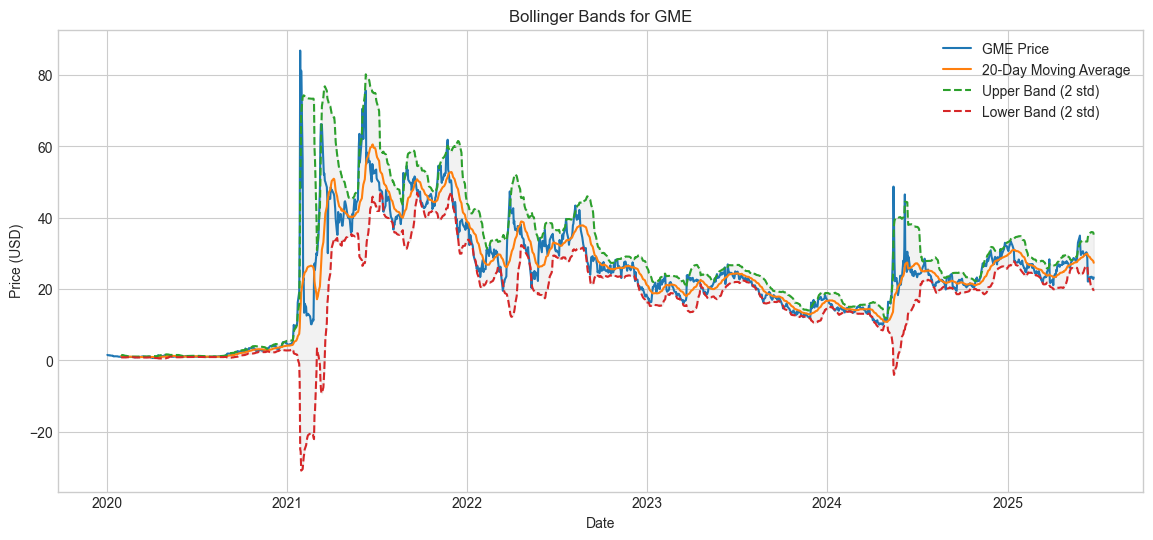

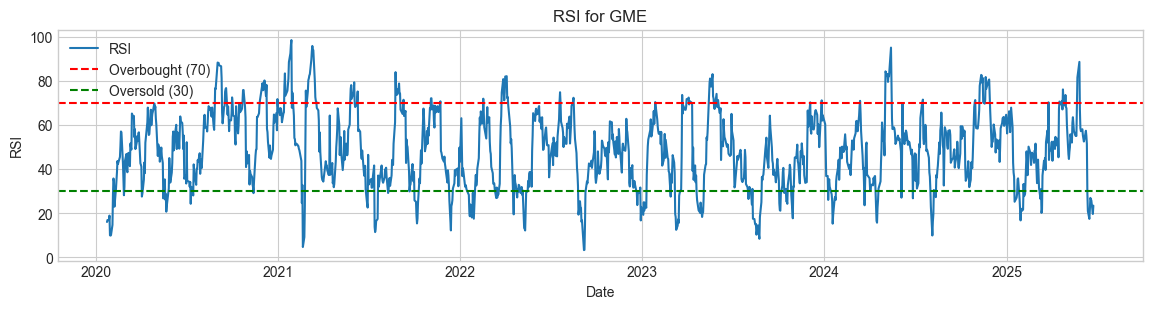

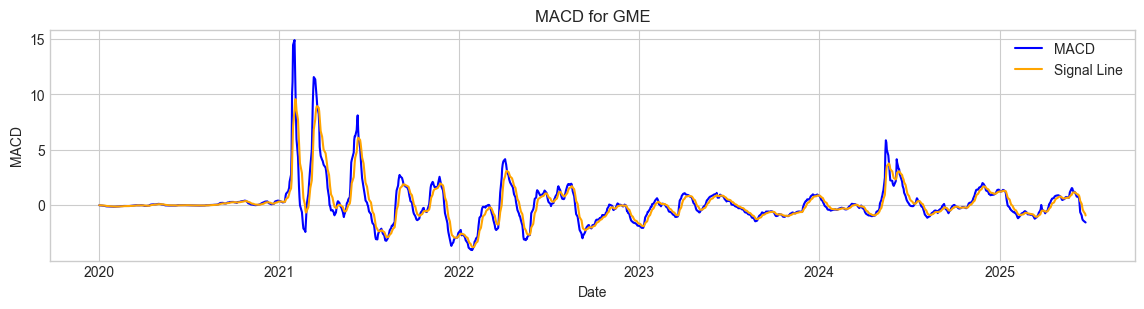

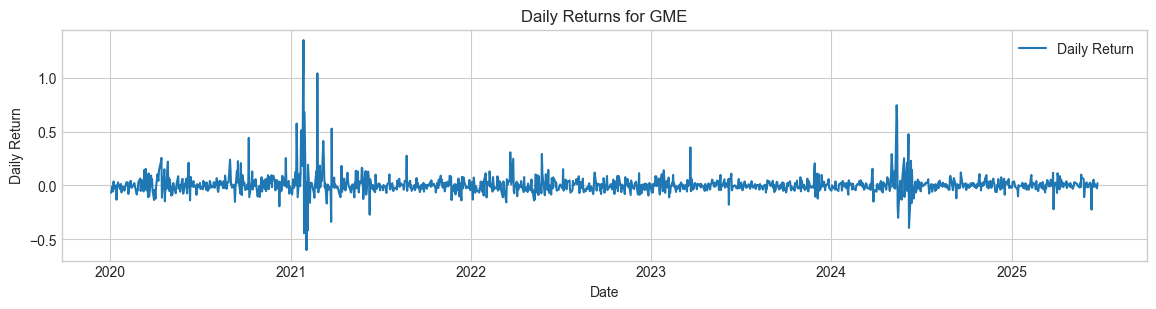


--- AMC ---


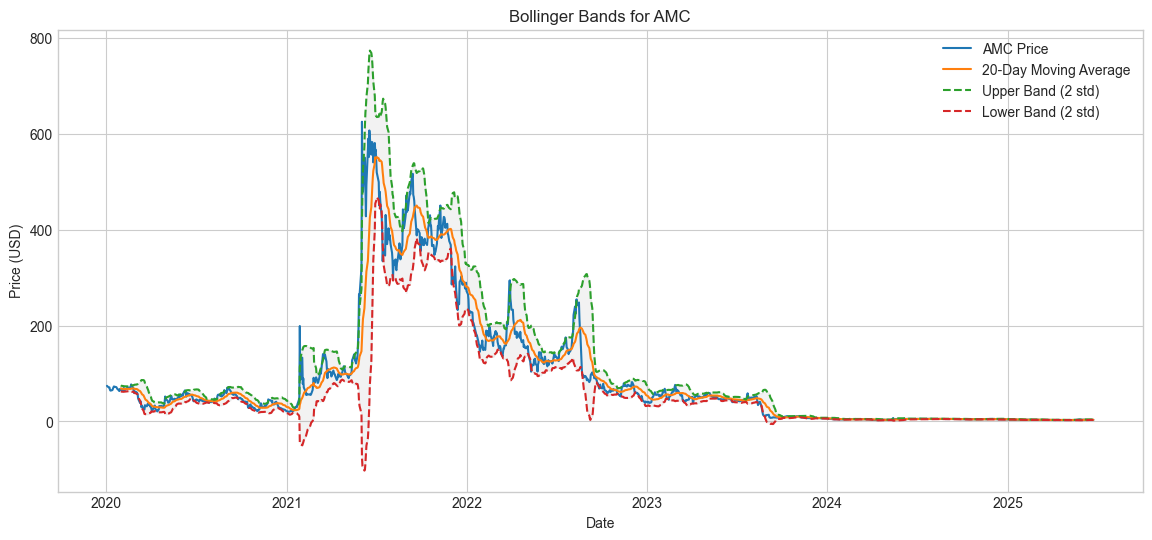

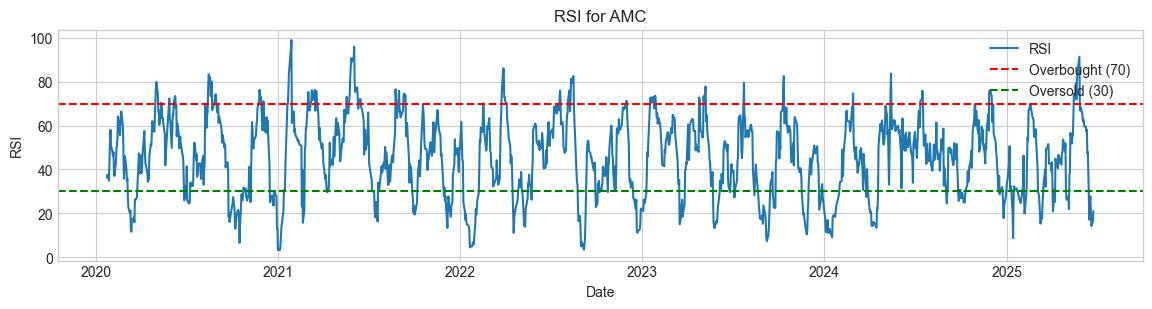

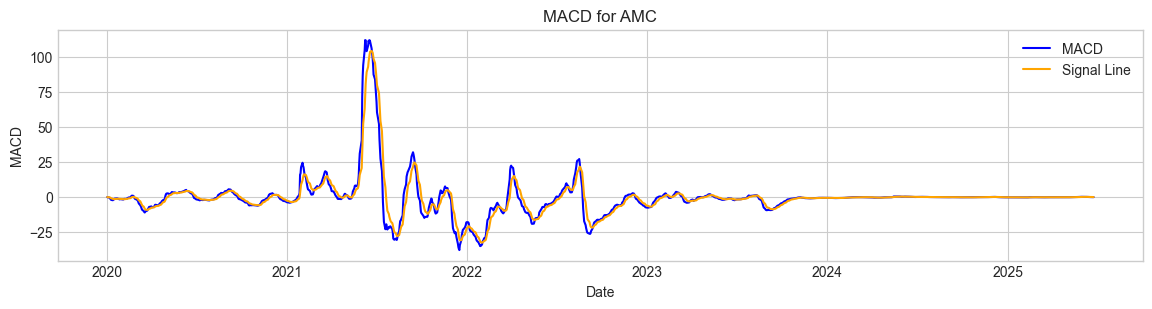

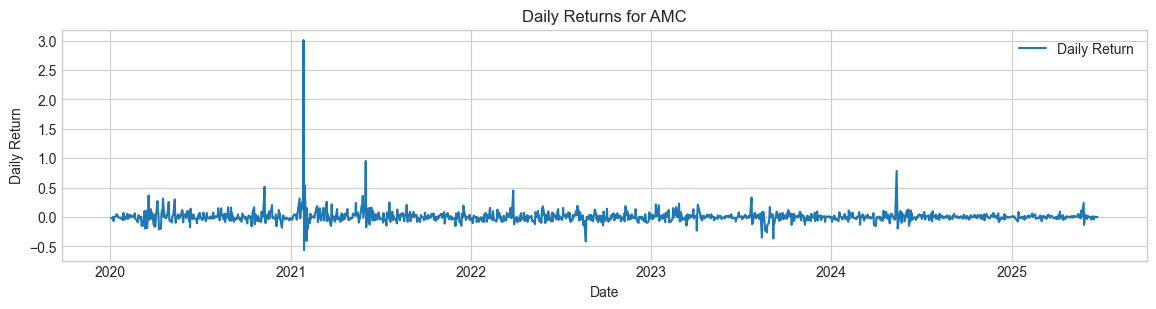


All calculations and plots are complete for all stocks!
- Daily returns show how much the price changes each day.
- Bollinger Bands help you see if a stock is high or low compared to its recent average.
- RSI shows if a stock is overbought (>70) or oversold (<30).
- MACD helps spot trend changes.



In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Calculate Daily Returns (for closing prices only)
returns = close_prices.pct_change()
print("First 5 rows of daily returns:")
print(returns.head())

# 2. Define RSI calculation function
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# 3. Loop through each stock and calculate/plot all measures
for stock in stocks:
    print(f"\n--- {stock} ---")

    # --- Bollinger Bands ---
    window = 20
    rolling_mean = close_prices[stock].rolling(window).mean()
    rolling_std = close_prices[stock].rolling(window).std()
    upper_band = rolling_mean + (rolling_std * 2)
    lower_band = rolling_mean - (rolling_std * 2)

    plt.figure(figsize=(14, 6))
    plt.plot(close_prices[stock], label=f'{stock} Price')
    plt.plot(rolling_mean, label='20-Day Moving Average')
    plt.plot(upper_band, label='Upper Band (2 std)', linestyle='--')
    plt.plot(lower_band, label='Lower Band (2 std)', linestyle='--')
    plt.fill_between(close_prices.index, lower_band, upper_band, color='gray', alpha=0.1)
    plt.title(f'Bollinger Bands for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

    # --- RSI ---
    rsi = compute_rsi(close_prices[stock])
    plt.figure(figsize=(14, 3))
    plt.plot(rsi, label='RSI')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title(f'RSI for {stock}')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.show()

    # --- MACD ---
    exp1 = close_prices[stock].ewm(span=12, adjust=False).mean()
    exp2 = close_prices[stock].ewm(span=26, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=9, adjust=False).mean()
    plt.figure(figsize=(14, 3))
    plt.plot(macd, label='MACD', color='blue')
    plt.plot(signal, label='Signal Line', color='orange')
    plt.title(f'MACD for {stock}')
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.legend()
    plt.show()

    # --- Daily Returns Plot ---
    plt.figure(figsize=(14, 3))
    plt.plot(returns[stock], label='Daily Return')
    plt.title(f'Daily Returns for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.show()

print("""
All calculations and plots are complete for all stocks!
- Daily returns show how much the price changes each day.
- Bollinger Bands help you see if a stock is high or low compared to its recent average.
- RSI shows if a stock is overbought (>70) or oversold (<30).
- MACD helps spot trend changes.
""")